<h1>HW Media Data Reporter Assessment</h1>

_____________________________________________
<h3>Part 1</h3>

<h4>Problem description</h4>

Part 1 will be a review of your ability take a distinct dataset and extract unique insights. I'll ask you to take a look at the file and let me know what you see. What patterns? Anything interesting or compelling that jumps out at you? What’s a good visual way to understand what the data says this week?

You should then visualize that dataset for public consumption. The analysis and visualization will be based on the following dataset:

<ul>
    <li><strong>Data:</strong> Immediate Sales</li>
    <li><strong>Definition:</strong> All home sales that were listed and took offers so quickly that they didn't spend any time on the active market. Maybe they went into contract within hours or just a couple days since being listed.</li>
    <li><strong>Source:</strong> Altos Research</li>
    <li><strong>File type:</strong> Excel</li>
</ul>
For visualizing the Immediate Sales data, we are not prescriptive on the chart type, chart design, or software you use for the final graphic output; however, being able to walk us through how you chose the chart type, chart design and software you used to compile and visualize the data will be important. An example of a chart we’ve built using Altos data can be found here.


<h4>Data cleaning</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sources/immediate-sales-2023-06-02.csv')

In [3]:
data.head()

,mls_hash,listing_source_master_id,address,city,state,zip,property_type,price,listed_dt,pend_dt,is_in_listings
0,-5479328573539341532,837000,23 Ridgetop Ln,ELMA,WA,98541,100,497000,NaN,2023-06-02,False
1,-4468521947906742374,623000,NaN,NEW YORK,NY,10012,400,525000,NaN,2023-06-02,False
2,-781276491769275607,78000,708 N Western,MARION,IN,46952,100,29900,NaN,2023-06-02,False
3,4009441286436866814,486000,2345 Mirador,VISTA,CA,92084,100,1575000,NaN,2023-06-02,False
4,5612629334589475676,207000,145 N Pond,CHESTER,NH,3036,100,575000,NaN,2023-06-02,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23470 entries, 0 to 23469
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mls_hash                  23470 non-null  int64 
 1   listing_source_master_id  23470 non-null  int64 
 2   address                   23227 non-null  object
 3   city                      23470 non-null  object
 4   state                     23470 non-null  object
 5   zip                       23470 non-null  int64 
 6   property_type             23470 non-null  int64 
 7   price                     23470 non-null  int64 
 8   listed_dt                 660 non-null    object
 9   pend_dt                   23470 non-null  object
 10  is_in_listings            23470 non-null  bool  
dtypes: bool(1), int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
# which column has a unique identifier for every single row?
len(data.listing_source_master_id.unique()), len(data.mls_hash.unique())

(245, 23470)

In [6]:
# use mls_hash as index
data.set_index('mls_hash', inplace = True)

In [7]:
# make sure zip codes are five-digits long and are strings, not integers
data['zip'] = [f'{x:05}' for x in data.zip]

In [8]:
data.property_type.unique()

array([ 100,  400,  500, 1300,  200,  300, 1400,  700,  600,  900],
      dtype=int64)

In [9]:
# convert property types from integers to useful labels
property_types = {
    100: 'single-family',
    200: 'condo/townhome',
    300: 'co-op', 
    400: 'multi-unit'
}
data['property_type'] = [property_types[k] if k in property_types.keys() else 'non-residential' for k in data.property_type]
data.head()

,listing_source_master_id,address,city,state,zip,property_type,price,listed_dt,pend_dt,is_in_listings
mls_hash,,,,,,,,,,
-5479328573539341532,837000,23 Ridgetop Ln,ELMA,WA,98541,single-family,497000,NaN,2023-06-02,False
-4468521947906742374,623000,NaN,NEW YORK,NY,10012,multi-unit,525000,NaN,2023-06-02,False
-781276491769275607,78000,708 N Western,MARION,IN,46952,single-family,29900,NaN,2023-06-02,False
4009441286436866814,486000,2345 Mirador,VISTA,CA,92084,single-family,1575000,NaN,2023-06-02,False
5612629334589475676,207000,145 N Pond,CHESTER,NH,03036,single-family,575000,NaN,2023-06-02,False


In [10]:
# keep only the data relevant to HW
data = data.loc[data.property_type.isin(['single-family', 'condo/townhome'])]

In [11]:
# are all 'is_in_listings' values false? if so, column could be dropped
data.is_in_listings.unique()

array([False,  True])

In [12]:
# convert date columns to dates
data['listed_dt'] = pd.to_datetime(data.listed_dt)
data['pend_dt'] = pd.to_datetime(data.pend_dt)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20554 entries, -5479328573539341532 to 9222698232297278840
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   listing_source_master_id  20554 non-null  int64         
 1   address                   20390 non-null  object        
 2   city                      20554 non-null  object        
 3   state                     20554 non-null  object        
 4   zip                       20554 non-null  object        
 5   property_type             20554 non-null  object        
 6   price                     20554 non-null  int64         
 7   listed_dt                 639 non-null    datetime64[ns]
 8   pend_dt                   20554 non-null  datetime64[ns]
 9   is_in_listings            20554 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(5)
memory usage: 1.6+ MB


In [14]:
# listed_dt column has a lot of missing data
# do all rows with a listing date also have an 'is_in_listings' value of True?
data.loc[~data.listed_dt.isnull()].is_in_listings.unique()

array([ True])

In [15]:
# since a True value in 'is_in_listings' tells us a house was listed and most rows do not have a listed_dt, 
# we can drop this column
data.drop(columns = 'listed_dt', inplace = True)

In [16]:
# is the listing source a useful descriptor?
# are there only a few major listers? 
data.listing_source_master_id.value_counts().iloc[:10], data.listing_source_master_id.value_counts().iloc[-10:] 

(208000    1993
 229000    1926
 207000    1310
 72000      657
 881000     614
 517000     579
 671000     512
 866000     472
 756000     395
 817000     348
 Name: listing_source_master_id, dtype: int64,
 826000    1
 574000    1
 845000    1
 457000    1
 292000    1
 797000    1
 860000    1
 767000    1
 7500      1
 825000    1
 Name: listing_source_master_id, dtype: int64)

In [17]:
# since no listing sources are noticeably dominant in the data and there are several who list only one house,
# we can drop this column as well
data.drop(columns = 'listing_source_master_id', inplace = True)

In [18]:
# since we already have a unique id for each house, there are missing addresses, and addresses are not a useful descriptor,
# we can also drop the address column
data.drop(columns = 'address', inplace = True)

In [19]:
# do we have a range of dates?
data.pend_dt.unique()

array(['2023-06-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
# since there is only one value in the date column, we can drop this column
data.drop(columns = 'pend_dt', inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20554 entries, -5479328573539341532 to 9222698232297278840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            20554 non-null  object
 1   state           20554 non-null  object
 2   zip             20554 non-null  object
 3   property_type   20554 non-null  object
 4   price           20554 non-null  int64 
 5   is_in_listings  20554 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 983.5+ KB


We know have a dataframe with correct column types, only single-family houses or condos/townhomes, and no missing values for homes that had pending sales for the week of June 2, 2023.

We also have a dataset of historical housing inventories:

In [22]:
history = pd.read_csv('sources/inventory_line_chart.csv', 
                         parse_dates = True, 
                         index_col = 'Date')
history.rename(columns = {history.columns[0]:'Houses'}, inplace = True)
history.head()

,Houses
Date,
2017-01-06,822944
2017-01-13,824213
2017-01-20,826094
2017-01-27,824837
2017-02-03,825945


In [23]:
history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2017-01-06 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Houses  335 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [24]:
history.index.max()

Timestamp('2023-06-02 00:00:00')

<h4>Exploratory data analysis</h4>

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20554.0,460027.474263,640393.246556,4900.0,225000.0,345000.0,524999.75,45000000.0


In [26]:
# convert prices to thousands of dollars 
data['price'] = data.price.div(1000)

In [27]:
# create custom price bins for histogram
sale_bins = data.copy()
sale_bins['bin'] = ['Up to $250K' if x < 250 else '\$250K - $499K' if x < 500 else '\$500K - $749K' if x < 750 
                    else '\$750K - $999K' if x <1000 else '\$1M or More' for x in sale_bins.price]
sale_counts = sale_bins[['bin', 'price']].groupby('bin').count()
sale_counts['order'] = [0 if b == 'Up to $250K' else 1 if b == '\$250K - $499K' else 2 if b == '\$500K - $749K' 
                        else 3 if b == '\$750K - $999K' else 4 for b in sale_counts.index]
sale_counts.sort_values(by = 'order', inplace = True)

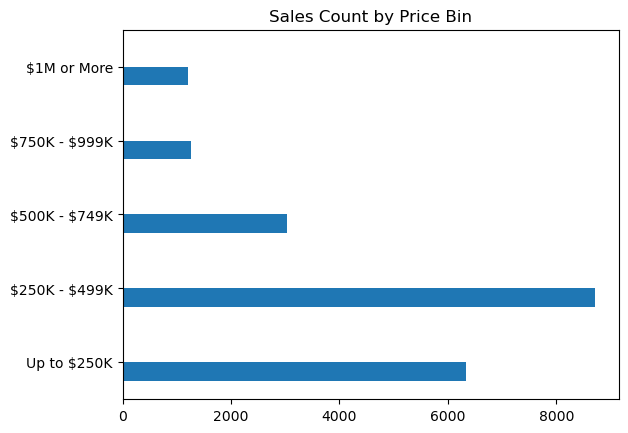

In [28]:
# plot histogram
sale_counts.plot(kind = 'barh', legend = False, title = 'Sales Count by Price Bin', ylabel = '')
plt.show()

In [29]:
# data aggregated by state
states = data[['state', 'price']].groupby('state').price.agg(['count', 'median'])
states['median'] = states['median'].apply(lambda x: int(round(x, 3) * 1000))

# 2022 resident population data downloaded from FRED
state_pop = pd.read_csv('sources/state_population.csv', skiprows = 1)
state_pop.rename(columns = {state_pop.columns[-1]:'thousands of residents'}, inplace = True)
state_pop['state'] = [x[:2] for x in state_pop['Series ID']]
state_pop = state_pop[['state', 'thousands of residents']]

# 2021 median household income data downloaded from FRED
state_inc = pd.read_csv('sources/state_median_income.csv', skiprows = 1)
state_inc.rename(columns = {state_inc.columns[-1]:'household median income'}, inplace = True)
state_inc['state'] = [x[8:10] for x in state_inc['Series ID']]
state_inc = state_inc[['state', 'household median income']]

# merge dataframes
states = states.reset_index().merge(state_pop).merge(state_inc).set_index('state')
states['sales per thousand residents'] = states['count'].div(states['thousands of residents'])
states['median sales price vs median household income'] = states['median'].div(
                                                    states['household median income'])

# clean up column names
states.rename(columns = {
    'count':'Home Sales',
    'median':'Median Sales Price'
}, inplace = True)
states.rename(columns = dict(zip(states.columns, states.columns.str.title())), inplace = True)
states

,Home Sales,Median Sales Price,Thousands Of Residents,Household Median Income,Sales Per Thousand Residents,Median Sales Price Vs Median Household Income
state,,,,,,
AK,16,325000,733.583,81133,0.021811,4.005768
AL,219,262000,5074.296,56929,0.043159,4.602224
AR,235,240000,3045.637,50784,0.077160,4.725898
AZ,368,426500,7359.197,70821,0.050005,6.022225
CA,778,695000,39029.342,81575,0.019934,8.519767
CO,668,583000,5839.926,84954,0.114385,6.862537
CT,732,439900,3626.205,80958,0.201864,5.433682
DC,13,960000,671.803,90640,0.019351,10.591350
DE,66,382450,1018.396,68687,0.064808,5.568011


In [30]:
# data aggregated by city
cities = data[['city', 'state', 'price']].copy()
cities['city'] = [x.capitalize() + ', ' + y for x, y in zip(cities.city, cities.state)]
cities = cities[['city', 'price']].groupby('city').price.agg(['count', 'median'])
cities['median'] = cities['median'].apply(lambda x: int(round(x, 3) * 1000))

# 2022 resident population data downloaded from FRED
city_pop = pd.read_csv('sources/city_population.csv', skiprows = 1)
city_pop.rename(columns = {city_pop.columns[-1]:'thousands of residents',
                          'Region Name':'city'}, inplace = True)
city_pop = city_pop[['city', 'thousands of residents']]

# 2021 per capita personal income data downloaded from FRED
city_inc = pd.read_csv('sources/city_per_cap_income.csv', skiprows = 1)
city_inc.rename(columns = {city_inc.columns[-1]:'per capita personal income',
                          'Region Name':'city'}, inplace = True)
city_inc = city_inc[['city', 'per capita personal income']]

# merge dataframes
cities = cities.reset_index().merge(city_pop).merge(city_inc).set_index('city')
cities['sales per thousand residents'] = cities['count'].div(cities['thousands of residents'])
cities['median sales price vs per capita personal income'] = cities['median'].div(
                                                    cities['per capita personal income'])

# clean up column names
cities.rename(columns = {
    'count':'Home Sales',
    'median':'Median Sales Price'
}, inplace = True)
cities.rename(columns = dict(zip(cities.columns, cities.columns.str.title())), inplace = True)
cities

,Home Sales,Median Sales Price,Thousands Of Residents,Per Capita Personal Income,Sales Per Thousand Residents,Median Sales Price Vs Per Capita Personal Income
city,,,,,,
"Abilene, TX",6,210000,179.308,55556.0,0.033462,3.779970
"Akron, OH",25,164900,697.627,58735.0,0.035836,2.807525
"Albuquerque, NM",49,333500,919.543,52263.0,0.053287,6.381187
"Amarillo, TX",7,152000,271.171,56248.0,0.025814,2.702318
"Ames, IA",1,309900,126.282,49320.0,0.007919,6.283455
...,...,...,...,...,...,...
"Wichita, KS",48,207450,650.039,56343.0,0.073842,3.681913
"Williamsport, PA",1,228900,113.104,50464.0,0.008841,4.535907
"Wilmington, NC",12,400100,300.658,55750.0,0.039912,7.176682


In [31]:
# convert houses in inventory to thousands of houses in inventory
history['Houses'] = history.Houses.div(1000)

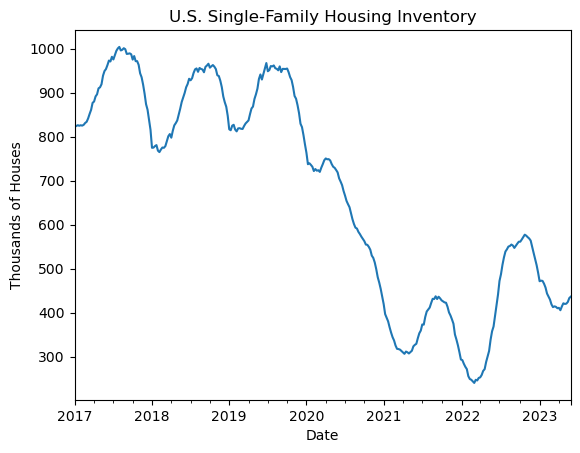

In [32]:
history.plot(title = 'U.S. Single-Family Housing Inventory', legend = False, ylabel = 'Thousands of Houses')
plt.show()

In [33]:
# convert back to absolute number of houses
history['Houses'] = history.Houses.mul(1000).astype('int')
# calculate differences
history['weekly change'] = history.Houses.diff(periods = 1)
history['yearly change'] = history.Houses.diff(periods = 52)
# create shifted columns
history['year ago'] = history.Houses.shift(52)
history['two years ago'] = history.Houses.shift(104)
history.dropna(inplace = True)
history.rename(columns = {'Houses':'Current'}, inplace = True)
history.rename(columns = dict(zip(history.columns, history.columns.str.title())), inplace = True)
history.head()

,Current,Weekly Change,Yearly Change,Year Ago,Two Years Ago
Date,,,,,
2019-01-04,816822,-30399.0,42132.0,774690.0,822944.0
2019-01-11,814555,-2267.0,39433.0,775122.0,824213.0
2019-01-18,824888,10333.0,46329.0,778559.0,826094.0
2019-01-25,827057,2169.0,46267.0,780790.0,824837.0
2019-02-01,816162,-10895.0,47953.0,768209.0,825945.0


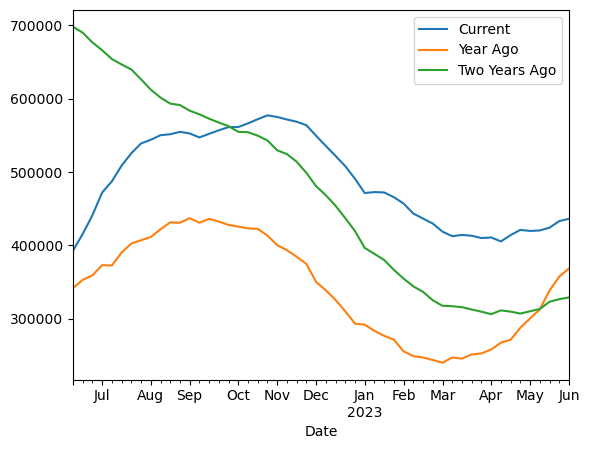

In [34]:
history[['Current', 'Year Ago', 'Two Years Ago']].iloc[-52:,].plot()
plt.show()

In [35]:
# calculate most recent max and its date
history['highest since'] = [history.loc[(history.Current >= history.loc[x].Current)&(history.index < x)].index.max() 
                            for x in history.index]
history.loc[history['highest since'].isnull(), 'highest since'] = history.loc[history['highest since'].isnull()].index
history['previous high'] = [history.loc[x].Current for x in history['highest since']]
# calculate most recent min and its date
history['lowest since'] = [history.loc[(history.Current <= history.loc[x].Current)&(history.index < x)].index.max() 
                           for x in history.index]
history.loc[history['lowest since'].isnull(), 'lowest since'] = history.loc[history['lowest since'].isnull()].index
history['previous low'] = [history.loc[x].Current for x in history['lowest since']]
# calculate max inventory in dataset up to current row and its date
history['record high'] = history.Current.cummax()
history['record high date'] = [history.loc[(history.Current==history['record high'])&(history.index < x)].index.max() 
                               for x in history.index]
# calculate min inventory in dataset up to current row and its date
history['record low'] = history.Current.cummin()
history['record low date'] = [history.loc[(history.Current==history['record low'])&(history.index < x)].index.max() 
                              for x in history.index]

history.rename(columns = dict(zip(history.columns, history.columns.str.title())), inplace = True)
history.tail()

,Current,Weekly Change,Yearly Change,Year Ago,Two Years Ago,Highest Since,Previous High,Lowest Since,Previous Low,Record High,Record High Date,Record Low,Record Low Date
Date,,,,,,,,,,,,,
2023-05-05,419725,-1441.0,119244.0,300481.0,310278.0,2023-04-28,421166,2023-04-21,414010,967376,2019-06-28,240194,2022-03-04
2023-05-12,420381,656.0,107524.0,312857.0,313356.0,2023-04-28,421166,2023-05-05,419725,967376,2019-06-28,240194,2022-03-04
2023-05-19,424190,3809.0,85791.0,338399.0,323302.0,2023-02-24,429757,2023-05-12,420381,967376,2019-06-28,240194,2022-03-04
2023-05-26,433104,8914.0,75522.0,357582.0,326728.0,2023-02-17,436558,2023-05-19,424190,967376,2019-06-28,240194,2022-03-04
2023-06-02,436284,3180.0,67848.0,368436.0,329167.0,2023-02-17,436558,2023-05-26,433104,967376,2019-06-28,240194,2022-03-04


<h4>Save dataframes to spreadsheets</h4>

In [36]:
sale_counts.to_excel('cleaned data/SalesCounts.xlsx')
states.to_excel('cleaned data/States.xlsx')
cities.to_excel('cleaned data/Cities.xlsx')
history.to_excel('cleaned data/Inventory.xlsx')